In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
dataset = pd.read_csv('../data/dataset.csv')
print(dataset)

# Define covariates, treatment, and outcome
covariate_cols = ['S3', 'C1', 'C2', 'C3', 'XC', 'X1', 'X2', 'X3', 'X4', 'X5']
treatment_col = 'Z'
outcome_col = 'Y'

# Split the data into training and testing sets
train_data, test_data = train_test_split(dataset, test_size=0.3, random_state=42)

# Standardize the covariates
scaler = StandardScaler()
train_data[covariate_cols] = scaler.fit_transform(train_data[covariate_cols])
test_data[covariate_cols] = scaler.transform(test_data[covariate_cols])

       schoolid  Z         Y  S3  C1  C2  C3  XC        X1        X2  \
0            76  1  0.081602   6   4   2   1   4  0.334544  0.648586   
1            76  1 -0.385869   4  12   2   1   4  0.334544  0.648586   
2            76  1  0.398184   6   4   2   0   4  0.334544  0.648586   
3            76  1 -0.175037   6   4   2   0   4  0.334544  0.648586   
4            76  1  0.884583   6   4   1   0   4  0.334544  0.648586   
...         ... ..       ...  ..  ..  ..  ..  ..       ...       ...   
10386         1  0  0.423366   7   4   2   1   3  1.185986 -1.129889   
10387         1  0 -0.197092   7   4   2   1   3  1.185986 -1.129889   
10388         1  0  0.141698   2  15   1   1   3  1.185986 -1.129889   
10389         1  0 -0.351565   5   4   1   1   3  1.185986 -1.129889   
10390         1  0  0.211240   5   1   2   1   3  1.185986 -1.129889   

             X3        X4        X5  
0     -1.310927  0.224077 -0.426757  
1     -1.310927  0.224077 -0.426757  
2     -1.310927  0.22

<ipython-input-1-c5c0d6b74b01>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[covariate_cols] = scaler.fit_transform(train_data[covariate_cols])
C:\Users\dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-1-c5c0d6b74b01>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR

# Define the parameter grid for each model
param_grids = {
    'RandomForest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    'NeuralNetwork': {
        'model': MLPRegressor(max_iter=500),
        'params': {
            'hidden_layer_sizes': [(50,), (100,), (100, 100)],
            'activation': ['relu', 'tanh'],
            'solver': ['adam', 'sgd']
        }
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1.0, 10.0]
        }
    },
    'Lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.1, 1.0, 10.0]
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'kernel': ['linear', 'rbf'],
            'C': [0.1, 1.0, 10.0],
            'epsilon': [0.1, 0.2, 0.5]
        }
    },
    'ExtraTrees': {
        'model': ExtraTreesRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'AdaBoost': {
        'model': AdaBoostRegressor(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    }
}



## Grid_Search_Cv
The function takes several inputs: the dataset (data), the column names for the treatment and outcome variables (treatment_col and outcome_col), a list of covariates (covariate_cols), the model to be tuned (model), a dictionary of hyperparameters to search over (params), and a string representing the meta-learner being used (meta_learner).

GridSearchCV is a powerful tool that automates the process of searching through a grid of hyperparameters to identify the optimal configuration. In this instance, the function specifies several important parameters: the estimator is set to the model passed to the function, and the param_grid contains the hyperparameters to be explored. The cv=5 parameter indicates that 5-fold cross-validation will be used, which involves splitting the data into five parts, training the model on four parts, and validating it on the remaining part, rotating this process until all data has been used for validation. This cross-validation approach helps ensure that the model’s performance is robust and not overly dependent on any particular subset of the data. The scoring parameter is set to neg_mean_squared_error, meaning that the model's performance is evaluated based on its Mean Squared Error, with a more negative value indicating better performance. The n_jobs=-1 parameter allows the computation to utilize all available CPU cores, speeding up the grid search process.

In [ ]:
import numpy as np
def grid_search_cv(data, treatment_col, outcome_col, covariate_cols, model, params, meta_learner):
    """
    Perform GridSearchCV for hyperparameter tuning and return the best model.
    """
    X = data[covariate_cols + [treatment_col]]
    y = data[outcome_col]

    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X, y)

    print(f'Best parameters for {meta_learner} with {model.__class__.__name__}: {grid_search.best_params_}')

    return grid_search.best_estimator_

def s_learner(data, treatment_col, outcome_col, covariate_cols, model):
    """
    Train an S-learner model to estimate CATE.
    """
    X = data[covariate_cols + [treatment_col]]
    y = data[outcome_col]
    model.fit(X, y)
    return model

def t_learner(data, treatment_col, outcome_col, covariate_cols, model):
    """
    Train a T-learner model to estimate CATE.
    """
    treated = data[data[treatment_col] == 1]
    control = data[data[treatment_col] == 0]
    X_treated = treated[covariate_cols]
    y_treated = treated[outcome_col]
    X_control = control[covariate_cols]
    y_control = control[outcome_col]
    model_treated = model.fit(X_treated, y_treated)
    model_control = model.fit(X_control, y_control)
    return model_treated, model_control

def x_learner(data, treatment_col, outcome_col, covariate_cols, model):
    """
    Train an X-learner model to estimate CATE.
    """
    treated = data[data[treatment_col] == 1]
    control = data[data[treatment_col] == 0]
    X_treated = treated[covariate_cols]
    y_treated = treated[outcome_col]
    X_control = control[covariate_cols]
    y_control = control[outcome_col]
    model_treated = model.fit(X_treated, y_treated)
    model_control = model.fit(X_control, y_control)
    treated_outcome = model_control.predict(X_treated)
    control_outcome = model_treated.predict(X_control)
    treatment_effect_treated = y_treated - treated_outcome
    treatment_effect_control = control_outcome - y_control
    model_treatment_effect_treated = model.fit(X_treated, treatment_effect_treated)
    model_treatment_effect_control = model.fit(X_control, treatment_effect_control)
    return model_treatment_effect_treated, model_treatment_effect_control

def r_learner(data, treatment_col, outcome_col, covariate_cols, model):
    """
    Train an R-learner model to estimate CATE.
    """
    X = data[covariate_cols]
    T = data[treatment_col]
    y = data[outcome_col]
    y_model = model
    y_model.fit(X, y)
    t_model = model
    t_model.fit(X, T)
    y_residual = y - y_model.predict(X)
    t_residual = T - t_model.predict(X)
    t_residual_clipped = t_residual.clip(lower=0.01)
    y_residual = (y_residual - np.mean(y_residual)) / np.std(y_residual)
    t_residual_clipped = (t_residual_clipped - np.mean(t_residual_clipped)) / np.std(t_residual_clipped)
    epsilon = 1e-3 * np.std(t_residual)
    t_residual_regularized = t_residual + epsilon
    tau_model = Ridge(alpha=1.0)
    tau_model.fit(X, y_residual / t_residual_regularized)
    return tau_model, y_model, t_model, y_residual, t_residual



In [5]:
from sklearn.metrics import mean_squared_error

def evaluate_model(test_data, treatment_col, outcome_col, covariate_cols, model, meta_learner):
    X_test = test_data[covariate_cols + [treatment_col]]
    y_test = test_data[outcome_col]
    if meta_learner == 's':
        predictions = model.predict(X_test)
    elif meta_learner == 't':
        treated, control = model
        predictions_treated = treated.predict(test_data[test_data[treatment_col] == 1][covariate_cols])
        predictions_control = control.predict(test_data[test_data[treatment_col] == 0][covariate_cols])
        predictions = pd.concat([pd.Series(predictions_treated), pd.Series(predictions_control)], ignore_index=True)
    elif meta_learner == 'x':
        treated, control = model
        predictions_treated = treated.predict(test_data[test_data[treatment_col] == 1][covariate_cols])
        predictions_control = control.predict(test_data[test_data[treatment_col] == 0][covariate_cols])
        predictions = pd.concat([pd.Series(predictions_treated), pd.Series(predictions_control)], ignore_index=True)
    elif meta_learner == 'r':
        tau_model, _, _, _, _ = model
        predictions = tau_model.predict(test_data[covariate_cols])
        print("Predictions:")
        print(pd.Series(predictions).describe())
    mse = mean_squared_error(y_test, predictions)
    return mse

mse_results = []

for model_name, config in param_grids.items():
    best_model = grid_search_cv(train_data, treatment_col, outcome_col, covariate_cols, config['model'], config['params'], 'S-Learner')
    s_model = s_learner(train_data, treatment_col, outcome_col, covariate_cols, best_model)
    mse_s = evaluate_model(test_data, treatment_col, outcome_col, covariate_cols, s_model, 's')
    mse_results.append({'Meta-Learner': 'S-Learner', 'Model': model_name, 'MSE': mse_s})

    best_model = grid_search_cv(train_data, treatment_col, outcome_col, covariate_cols, config['model'], config['params'], 'T-Learner')
    t_model_treated, t_model_control = t_learner(train_data, treatment_col, outcome_col, covariate_cols, best_model)
    mse_t = evaluate_model(test_data, treatment_col, outcome_col, covariate_cols, (t_model_treated, t_model_control), 't')
    mse_results.append({'Meta-Learner': 'T-Learner', 'Model': model_name, 'MSE': mse_t})

    best_model = grid_search_cv(train_data, treatment_col, outcome_col, covariate_cols, config['model'], config['params'], 'X-Learner')
    x_model_treated, x_model_control = x_learner(train_data, treatment_col, outcome_col, covariate_cols, best_model)
    mse_x = evaluate_model(test_data, treatment_col, outcome_col, covariate_cols, (x_model_treated, x_model_control), 'x')
    mse_results.append({'Meta-Learner': 'X-Learner', 'Model': model_name, 'MSE': mse_x})

    best_model = grid_search_cv(train_data, treatment_col, outcome_col, covariate_cols, config['model'], config['params'], 'R-Learner')
    r_model, y_model, t_model, y_residual, t_residual = r_learner(train_data, treatment_col, outcome_col, covariate_cols, best_model)
    mse_r = evaluate_model(test_data, treatment_col, outcome_col, covariate_cols, (r_model, y_model, t_model, y_residual, t_residual), 'r')
    mse_results.append({'Meta-Learner': 'R-Learner', 'Model': model_name, 'MSE': mse_r})

mse_df = pd.DataFrame(mse_results)

Best parameters for S-Learner with RandomForestRegressor: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best parameters for T-Learner with RandomForestRegressor: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best parameters for X-Learner with RandomForestRegressor: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best parameters for R-Learner with RandomForestRegressor: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Predictions:
count    3118.000000
mean        0.447670
std         0.848734
min        -1.658837
25%        -0.110550
50%         0.387056
75%         0.912308
max         3.882968
dtype: float64
Best parameters for S-Learner with GradientBoostingRegressor: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best parameters for T-Learner with GradientBoostingRegressor: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best parameters for X-Learner with GradientBoostingRegressor: {'learning

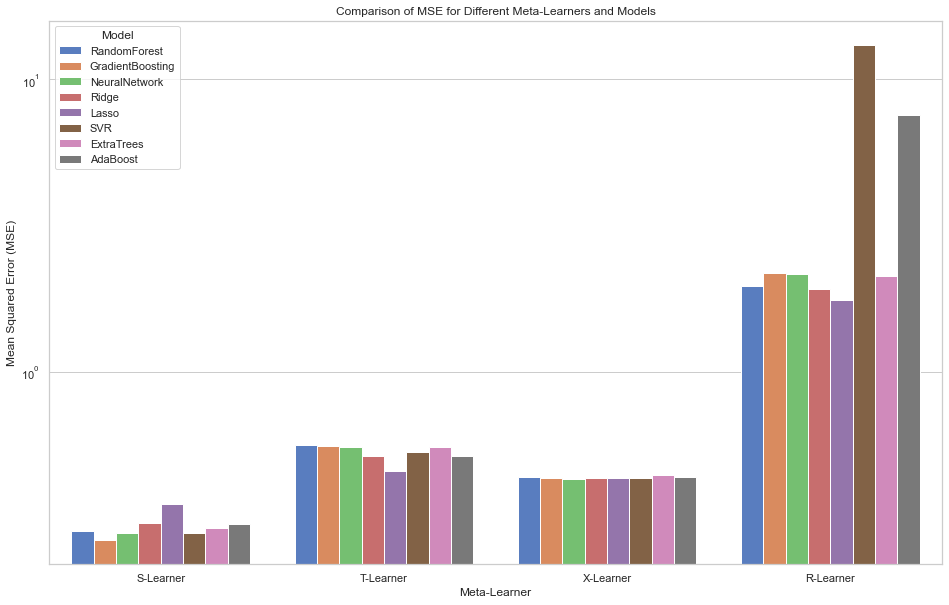

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(16, 10))
sns.barplot(x='Meta-Learner', y='MSE', hue='Model', data=mse_df, palette="muted")
plt.title('Comparison of MSE for Different Meta-Learners and Models')
plt.xlabel('Meta-Learner')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend(title='Model')
plt.yscale('log')
plt.show()


